In [285]:
import pandas as pd
##import numpy as np
##import seaborn as sb
import matplotlib.pyplot as plt

In [286]:
## convert csv file to DataFrame
full_frame=pd.read_csv('Crime_Data_from_2020_to_Present.csv')

In [287]:
full_frame.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [288]:
## the data frame has 28 columns and 1 005 199 rows
full_frame.shape

(1005199, 28)

In [289]:
## check the column names and data type
full_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005199 entries, 0 to 1005198
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1005199 non-null  int64  
 1   Date Rptd       1005199 non-null  object 
 2   DATE OCC        1005199 non-null  object 
 3   TIME OCC        1005199 non-null  int64  
 4   AREA            1005199 non-null  int64  
 5   AREA NAME       1005199 non-null  object 
 6   Rpt Dist No     1005199 non-null  int64  
 7   Part 1-2        1005199 non-null  int64  
 8   Crm Cd          1005199 non-null  int64  
 9   Crm Cd Desc     1005199 non-null  object 
 10  Mocodes         853440 non-null   object 
 11  Vict Age        1005199 non-null  int64  
 12  Vict Sex        860418 non-null   object 
 13  Vict Descent    860406 non-null   object 
 14  Premis Cd       1005183 non-null  float64
 15  Premis Desc     1004611 non-null  object 
 16  Weapon Used Cd  327282 non-null   fl

In [290]:
## the data frame doesn't contain any duplicates
full_frame[full_frame.duplicated()]

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON


In [291]:
##The 'DR_NO' (Report number) has unique value for each row and might be used as index or primary key
full_frame[full_frame['DR_NO'].duplicated()]

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON


In [292]:
full_frame['DR_NO'].nunique()

1005199

 The goal of the analysis is to research the most common crime incident (theft of vehice) and
 to get any information about time of day, week and year when the incidents occured.

1. The first step is filtering to get the data frame, where all observations have crime code description 'vehicle stolen'

In [295]:
## create the object for crime 'vehicle stolen'
vehicle_stolen=full_frame[full_frame['Crm Cd Desc']=='VEHICLE - STOLEN'].copy()

In [296]:
vehicle_stolen.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130
5,200209713,05/03/2020 12:00:00 AM,05/02/2020 12:00:00 AM,1800,2,Rampart,245,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 W 4TH ST,NaN,34.0642,-118.2771
7,201308739,03/27/2020 12:00:00 AM,03/27/2020 12:00:00 AM,1210,13,Newton,1333,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,3200 S SAN PEDRO ST,NaN,34.0170,-118.2643
8,201112065,07/31/2020 12:00:00 AM,07/30/2020 12:00:00 AM,2030,11,Northeast,1161,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,NaN,NaN,NaN,KENMORE ST,FOUNTAIN,34.0953,-118.2974


In [297]:
## the data frame has 28 columns and 115 246 rows
vehicle_stolen.shape

(115246, 28)

2. The second step is selecting the columns we need for this specific analysis.
   I selected the following columns:
   1. 'DR_NO'- unique report number
   2. 'DATE OCC' - the date when the incident occured
   3. 'TIME OCC' - the time when the incident occured


In [299]:
## create the small data frame for the specific goal
vehicle_stolen_date_and_time=vehicle_stolen[['DR_NO', 'DATE OCC', 'TIME OCC']].copy()

In [300]:
vehicle_stolen_date_and_time.head()

,DR_NO,DATE OCC,TIME OCC
0,190326475,03/01/2020 12:00:00 AM,2130
4,200412582,09/09/2020 12:00:00 AM,630
5,200209713,05/02/2020 12:00:00 AM,1800
7,201308739,03/27/2020 12:00:00 AM,1210
8,201112065,07/30/2020 12:00:00 AM,2030


In [301]:
## all 3 columns have the non-null values only. The 'DATE OCC' column has object (Timestamp) type, while the 'TIME OCC' column has the 'int' datatype. 
vehicle_stolen_date_and_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115246 entries, 0 to 1005197
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   DR_NO     115246 non-null  int64 
 1   DATE OCC  115246 non-null  object
 2   TIME OCC  115246 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.5+ MB


In [302]:
## transforming the dtype 'object - Timestamp' to dtype 'datetime'.
## the column 'DATE OCC' hasn't any data about time (12:00 a.m in all rows) so we get the date only in format YYYY-MM-DD
## how can I specify the format type in 'pd.to_datetime'? function pd.to_datetime (the object which I convert ,format= "%m/%d/%Y %I:%M:%S %p" (for this case) - 
## this is the original format before converting 'Timestamp' to datetime)

vehicle_stolen_date_and_time['DATE OCC'] = pd.to_datetime(vehicle_stolen_date_and_time['DATE OCC'], format= "%m/%d/%Y %I:%M:%S %p")


In [303]:
## change the column 'DATE OCC' from 'object -Timestamp' to datetime (without '12:00 a.m' which repeats in each date
## and doesn't contain any information about time when the incident occured)
## we change the column 'DATE OCC' in the same object 'vehicle_stolen_date_and_time'
# then we extracted year, month, day of week and month and day without year and added 6 new columns to the original data frame

In [304]:
## Create object PandasSeries - the column 'DATE OCC' after converting to daytime
data_1=vehicle_stolen_date_and_time['DATE OCC']

In [305]:
## create 5 new columns (year, month, day of week, day of week number, month and day) 
## and add them to the  dataframe 'vehicle_stolen_date_and_time' 
vehicle_stolen_date_and_time['Year']=data_1.dt.year

In [306]:
vehicle_stolen_date_and_time['Month_num']=data_1.dt.month

In [307]:
vehicle_stolen_date_and_time['Month']=data_1.dt.month_name()

In [308]:
vehicle_stolen_date_and_time['Day_of_week_num']=data_1.dt.weekday

In [309]:
vehicle_stolen_date_and_time['Day_of_week']=data_1.dt.day_name()

In [310]:
vehicle_stolen_date_and_time['month_day']=data_1.dt.strftime('%m-%d')

In [311]:
vehicle_stolen_date_and_time.head()

,DR_NO,DATE OCC,TIME OCC,Year,Month_num,Month,Day_of_week_num,Day_of_week,month_day
0,190326475,2020-03-01,2130,2020,3,March,6,Sunday,03-01
4,200412582,2020-09-09,630,2020,9,September,2,Wednesday,09-09
5,200209713,2020-05-02,1800,2020,5,May,5,Saturday,05-02
7,201308739,2020-03-27,1210,2020,3,March,4,Friday,03-27
8,201112065,2020-07-30,2030,2020,7,July,3,Thursday,07-30


In [312]:
vehicle_stolen_date_and_time.shape

(115246, 9)

In [772]:
vehicle_stolen_date_and_time

,DR_NO,DATE OCC,TIME OCC,Year,Month_num,Month,Day_of_week_num,Day_of_week,month_day
0,190326475,2020-03-01,2130,2020,3,March,6,Sunday,03-01
4,200412582,2020-09-09,630,2020,9,September,2,Wednesday,09-09
5,200209713,2020-05-02,1800,2020,5,May,5,Saturday,05-02
7,201308739,2020-03-27,1210,2020,3,March,4,Friday,03-27
8,201112065,2020-07-30,2030,2020,7,July,3,Thursday,07-30
...,...,...,...,...,...,...,...,...,...
1005182,250304198,2025-02-19,1100,2025,2,February,2,Wednesday,02-19
1005190,250304184,2025-02-14,1200,2025,2,February,4,Friday,02-14
1005193,250304214,2025-02-21,1530,2025,2,February,4,Friday,02-21
1005196,250304284,2025-03-30,2100,2025,3,March,6,Sunday,03-30


In [774]:
## sorting by date converted to 'datetime' 
sort_by_convert_date=vehicle_stolen_date_and_time.sort_values('DATE OCC')


In [776]:
## The data frame 'sort_by_convert_date' is the basic data frame for aggregative operations and searching for specific patterns
## The data frame 'sort_by_convert_date' contains 115 246 observations, starting from 01 January 2020 and ending in 30 March 2025
sort_by_convert_date

,DR_NO,DATE OCC,TIME OCC,Year,Month_num,Month,Day_of_week_num,Day_of_week,month_day
113004,200204420,2020-01-01,1800,2020,1,January,2,Wednesday,01-01
199743,201804223,2020-01-01,1400,2020,1,January,2,Wednesday,01-01
7092,200404013,2020-01-01,230,2020,1,January,2,Wednesday,01-01
187651,201604047,2020-01-01,2100,2020,1,January,2,Wednesday,01-01
162318,202004054,2020-01-01,1900,2020,1,January,2,Wednesday,01-01
...,...,...,...,...,...,...,...,...,...
1005035,250304281,2025-03-26,1645,2025,3,March,2,Wednesday,03-26
1004938,250504255,2025-03-27,1200,2025,3,March,3,Thursday,03-27
1005088,250304283,2025-03-27,1250,2025,3,March,3,Thursday,03-27
1004903,250504256,2025-03-27,1200,2025,3,March,3,Thursday,03-27


In [778]:
## As we will see later data for 3 months 2025 year isn't complete
## since most of incidents are not reported yet
## so we need to exclude these 3 months from statistical data
full_5_years=sort_by_convert_date[sort_by_convert_date['Year']!=2025].copy()

In [780]:
full_5_years

,DR_NO,DATE OCC,TIME OCC,Year,Month_num,Month,Day_of_week_num,Day_of_week,month_day
113004,200204420,2020-01-01,1800,2020,1,January,2,Wednesday,01-01
199743,201804223,2020-01-01,1400,2020,1,January,2,Wednesday,01-01
7092,200404013,2020-01-01,230,2020,1,January,2,Wednesday,01-01
187651,201604047,2020-01-01,2100,2020,1,January,2,Wednesday,01-01
162318,202004054,2020-01-01,1900,2020,1,January,2,Wednesday,01-01
...,...,...,...,...,...,...,...,...,...
974883,240317092,2024-12-17,1630,2024,12,December,1,Tuesday,12-17
917866,240513476,2024-12-22,1000,2024,12,December,6,Sunday,12-22
980120,240513435,2024-12-26,9,2024,12,December,3,Thursday,12-26
888854,241416029,2024-12-27,1415,2024,12,December,4,Friday,12-27


In [ ]:
## For the same reason we need the additional data frame where observations in November-December 2024 are also excluded 
## (this data isn't complete in December 2024 and probably isn't complete in November 2024)


In [782]:
years_5_noNovDec_24 =full_5_years [~((full_5_years['Year'] == 2024) & (full_5_years['Month'].isin(['November', 'December'])))].copy()

In [784]:
years_5_noNovDec_24


,DR_NO,DATE OCC,TIME OCC,Year,Month_num,Month,Day_of_week_num,Day_of_week,month_day
113004,200204420,2020-01-01,1800,2020,1,January,2,Wednesday,01-01
199743,201804223,2020-01-01,1400,2020,1,January,2,Wednesday,01-01
7092,200404013,2020-01-01,230,2020,1,January,2,Wednesday,01-01
187651,201604047,2020-01-01,2100,2020,1,January,2,Wednesday,01-01
162318,202004054,2020-01-01,1900,2020,1,January,2,Wednesday,01-01
...,...,...,...,...,...,...,...,...,...
926778,240315910,2024-10-31,2000,2024,10,October,3,Thursday,10-31
995045,240411170,2024-10-31,300,2024,10,October,3,Thursday,10-31
926552,241912791,2024-10-31,2200,2024,10,October,3,Thursday,10-31
983551,241216714,2024-10-31,1700,2024,10,October,3,Thursday,10-31


## 1. Distribution of car theft incidents by years

In [ ]:
## for this analisys I use the data frame full_5_years (2025 year is excluded, but November-December 2024 aren't excluded)

In [786]:
## grouping by year
group_year=full_5_years.groupby('Year')

In [760]:
type(group_year)

pandas.core.groupby.generic.DataFrameGroupBy

In [762]:
## Amount of observation for each year
count_year=group_year['DR_NO'].count()

In [764]:
count_year

Year
2020    20772
2021    23685
2022    24746
2023    24471
2024    21511
Name: DR_NO, dtype: int64

In [766]:
## check that the sum of all observation during 5 years = the rows count for entire dataframe 'full_5_years'
count_year.sum()

115185

In [790]:
## calculating the percentage for each year in relation to the amount of all cases during 5 years (115 185)
percentage=count_year/115185*100


In [331]:
percentage

Year
2020    18.033598
2021    20.562573
2022    21.483700
2023    21.244954
2024    18.675175
Name: DR_NO, dtype: float64

In [798]:
## create the small table showing count and percentage for each year
data=pd.DataFrame({'Amount of cases': count_year,  'Percentage':percentage})

In [800]:
data

,Amount of cases,Percentage
Year,,
2020,20772,18.033598
2021,23685,20.562573
2022,24746,21.483700
2023,24471,21.244954
2024,21511,18.675175


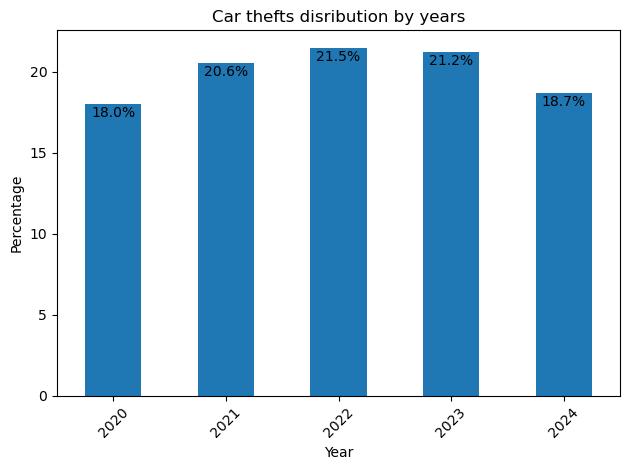

In [802]:

ax = data.plot.bar( y='Percentage', legend=False,)
##data.plot.bar(y='Percentage')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # x position
        height - 1,                     # y position slightly above the bar
        f'{height:.1f}%',               # label text
        ha='center', va='bottom'       # horizontal and vertical alignment
    )

plt.ylabel('Percentage')
plt.title('Car thefts disribution by years')

## Rotate x-axis labels
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Axes: >

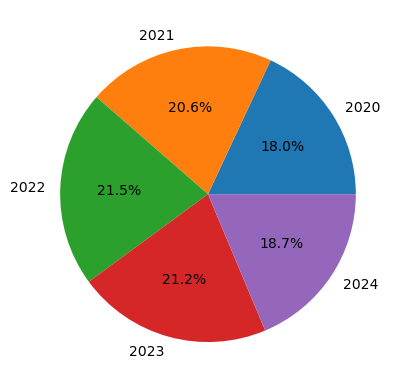

In [804]:
##  I think in this specific case pie plot doesn't seem the best choice since all its sectors are the same size visually (about 20 percent). 
##  Also category 'years' has the specific order (2020, 2021, 2022 etc.) and the bar plot reflects this order better than the pie plot.
## (as I feel, that's just my personal opinion)

data.plot.pie(y='Percentage', 
              autopct='%1.1f%%',  # Show one decimal place
              legend=False,       # Optional: Hide legend if not needed
               ylabel=''           # Optional: Remove default ylabel
             )
        
           

We observe a slight increase in the percentage of car thefts since 2020, followed by a decline almost back to previous levels by 2024.
The decrease in thefts in 2024 may be slightly less significant than shown in the chart due to incomplete data for November and December.
It's difficult to determine the exact reasons for this rise. It would be interesting to find statistics on the total number of registered 
vehicles in LA during this period and calculate the theft rate per vehicle. This chart may reflect not only an increase in the number of thefts 
but also a rise in the number of vehicles over these years. The opposite is also possible: if the number of vehicles in Los Angeles decreased
between 2021 and 2024, then the increase in thefts per vehicle would actually be even higher than this chart suggests.

## 2. Distrubution by days of week 


In [809]:
## we start from the dataframe 'years_5_noNovDec_24' (observations start 01 Jan 2020 and end 31 Dec 2024)
## this is the most cleaned data frame I couldn't use in grouping by year (for the reason I cannot compare 4 full years 2020-2023
## with the 10 months for 2024), but I can use this frame for grouping by days of week
years_5_noNovDec_24
## in this data frame we have 112 826 observations

,DR_NO,DATE OCC,TIME OCC,Year,Month_num,Month,Day_of_week_num,Day_of_week,month_day
113004,200204420,2020-01-01,1800,2020,1,January,2,Wednesday,01-01
199743,201804223,2020-01-01,1400,2020,1,January,2,Wednesday,01-01
7092,200404013,2020-01-01,230,2020,1,January,2,Wednesday,01-01
187651,201604047,2020-01-01,2100,2020,1,January,2,Wednesday,01-01
162318,202004054,2020-01-01,1900,2020,1,January,2,Wednesday,01-01
...,...,...,...,...,...,...,...,...,...
926778,240315910,2024-10-31,2000,2024,10,October,3,Thursday,10-31
995045,240411170,2024-10-31,300,2024,10,October,3,Thursday,10-31
926552,241912791,2024-10-31,2200,2024,10,October,3,Thursday,10-31
983551,241216714,2024-10-31,1700,2024,10,October,3,Thursday,10-31


In [811]:
## create the GroupBy object
group_weekday=years_5_noNovDec_24.groupby('Day_of_week')

In [817]:
amount_observ=group_weekday['DR_NO'].count()

In [819]:
amount_observ

Day_of_week
Friday       17450
Monday       15613
Saturday     16817
Sunday       15473
Thursday     15979
Tuesday      15475
Wednesday    16019
Name: DR_NO, dtype: int64

In [821]:
## just check
amount_observ.sum()

112826

In [823]:
## how many days were Mondays, Tuesdays etc. during all period of observation.
## just to see how it looks: grouping by category 'week days' and list of unique values for dates for each category
group_weekday['DATE OCC'].unique()

Day_of_week
Friday       [2020-01-03 00:00:00, 2020-01-10 00:00:00, 202...
Monday       [2020-01-06 00:00:00, 2020-01-13 00:00:00, 202...
Saturday     [2020-01-04 00:00:00, 2020-01-11 00:00:00, 202...
Sunday       [2020-01-05 00:00:00, 2020-01-12 00:00:00, 202...
Thursday     [2020-01-02 00:00:00, 2020-01-09 00:00:00, 202...
Tuesday      [2020-01-07 00:00:00, 2020-01-14 00:00:00, 202...
Wednesday    [2020-01-01 00:00:00, 2020-01-08 00:00:00, 202...
Name: DATE OCC, dtype: object

In [825]:
## how many days were Mondays, Tuesdays etc. during all period of observation
amount_of_days=group_weekday['DATE OCC'].nunique()

In [827]:
amount_of_days

Day_of_week
Friday       252
Monday       252
Saturday     252
Sunday       252
Thursday     253
Tuesday      252
Wednesday    253
Name: DATE OCC, dtype: int64

In [829]:
type(amount_of_days)

pandas.core.series.Series

In [831]:
observ_per_day=amount_observ/amount_of_days

In [833]:
table_week=pd.DataFrame({'Amount of incidents':amount_observ, 'Amount of days':amount_of_days, 'Average amount of incidents per weekday':observ_per_day })

In [835]:
table_week

,Amount of incidents,Amount of days,Average amount of incidents per weekday
Day_of_week,,,
Friday,17450,252,69.246032
Monday,15613,252,61.956349
Saturday,16817,252,66.734127
Sunday,15473,252,61.400794
Thursday,15979,253,63.158103
Tuesday,15475,252,61.408730
Wednesday,16019,253,63.316206


In [843]:
table_week['Rank']=table_week['Average amount of incidents per weekday'].rank()

In [845]:
table_week

,Amount of incidents,Amount of days,Average amount of incidents per weekday,Rank
Day_of_week,,,,
Friday,17450,252,69.246032,7.0
Monday,15613,252,61.956349,3.0
Saturday,16817,252,66.734127,6.0
Sunday,15473,252,61.400794,1.0
Thursday,15979,253,63.158103,4.0
Tuesday,15475,252,61.408730,2.0
Wednesday,16019,253,63.316206,5.0


In [847]:
## setting the order of week days
day_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [849]:
table_week.index = pd.Categorical(table_week.index, categories=day_order, ordered=True)

In [851]:
sort_table_week=table_week.sort_index()

In [853]:
sort_table_week

,Amount of incidents,Amount of days,Average amount of incidents per weekday,Rank
Monday,15613,252,61.956349,3.0
Tuesday,15475,252,61.408730,2.0
Wednesday,16019,253,63.316206,5.0
Thursday,15979,253,63.158103,4.0
Friday,17450,252,69.246032,7.0
Saturday,16817,252,66.734127,6.0
Sunday,15473,252,61.400794,1.0


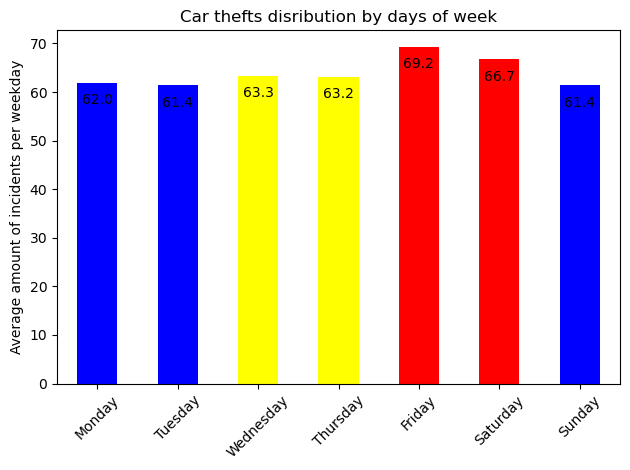

In [855]:
graph_wd = sort_table_week.plot.bar( y='Average amount of incidents per weekday', color=('blue', 'blue', 'yellow', 'yellow', 'red', 'red', 'blue'), legend=False)

for p in graph_wd.patches:
    height = p.get_height()
    graph_wd.text(
        p.get_x() + p.get_width() / 2,  # x position
        height - 5,                     # y position 
        f'{height:.1f}',               # label text
        ha='center', va='bottom'       # horizontal and vertical alignment
    )

plt.ylabel('Average amount of incidents per weekday')

plt.title('Car thefts disribution by days of week')

## Rotate x-axis labels
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

"From the bar chart, we can see that the number of car thefts remains almost constant from Sunday to Tuesday, slightly increases in the middle of the week — on Wednesday and Thursday — and rises significantly on Friday, with a slight decrease on Saturday."

It would be interesting to look at the distribution of data points within each category — for example, how large the gap is between the lowest and highest number of thefts on Fridays and Saturdays, how theft numbers vary across Fridays and Saturdays throughout the month and the year, and whether there are any unusually extreme Fridays and Saturdays.

## 3. Distribution during year - scatter plot and line graph patterns

In [363]:
## here I start from the dataframe 'sort_by_convert_date' (observations start 01 Jan 2020 and end 30 Mar 2025)
## and explain why I had to exclude observations Nov-Dec 2024 and Jan-Mar 2025 for searching distribution by years,
## days of week, and hours of day. 
sort_by_convert_date

,DR_NO,DATE OCC,TIME OCC,Year,Month_num,Month,Day_of_week_num,Day_of_week,month_day
113004,200204420,2020-01-01,1800,2020,1,January,2,Wednesday,01-01
199743,201804223,2020-01-01,1400,2020,1,January,2,Wednesday,01-01
7092,200404013,2020-01-01,230,2020,1,January,2,Wednesday,01-01
187651,201604047,2020-01-01,2100,2020,1,January,2,Wednesday,01-01
162318,202004054,2020-01-01,1900,2020,1,January,2,Wednesday,01-01
...,...,...,...,...,...,...,...,...,...
1005035,250304281,2025-03-26,1645,2025,3,March,2,Wednesday,03-26
1004938,250504255,2025-03-27,1200,2025,3,March,3,Thursday,03-27
1005088,250304283,2025-03-27,1250,2025,3,March,3,Thursday,03-27
1004903,250504256,2025-03-27,1200,2025,3,March,3,Thursday,03-27


In [364]:
##check the info about dataframe
sort_by_convert_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115246 entries, 113004 to 1005196
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   DR_NO            115246 non-null  int64         
 1   DATE OCC         115246 non-null  datetime64[ns]
 2   TIME OCC         115246 non-null  int64         
 3   Year             115246 non-null  int32         
 4   Month_num        115246 non-null  int32         
 5   Month            115246 non-null  object        
 6   Day_of_week_num  115246 non-null  int32         
 7   Day_of_week      115246 non-null  object        
 8   month_day        115246 non-null  object        
dtypes: datetime64[ns](1), int32(3), int64(2), object(3)
memory usage: 7.5+ MB


In [859]:
##grouping by the day of year and count of observations for each day
incident_count_by_date=sort_by_convert_date.groupby('DATE OCC')['DR_NO'].count()

In [861]:
incident_count_by_date

DATE OCC
2020-01-01    33
2020-01-02    34
2020-01-03    44
2020-01-04    43
2020-01-05    42
              ..
2025-03-13     1
2025-03-17     1
2025-03-26     1
2025-03-27     3
2025-03-30     1
Name: DR_NO, Length: 1853, dtype: int64

In [386]:
# just check. Obviously the 2025 year data for 3 months isn't complete - probably most of incidents are not reported yet)
incident_count_by_date.loc['2025-01-01':'2025-03-31']

DATE OCC
2025-01-01    1
2025-01-02    1
2025-01-14    1
2025-01-16    1
2025-01-20    1
2025-01-21    2
2025-01-22    1
2025-01-23    3
2025-01-26    3
2025-01-27    2
2025-01-28    1
2025-01-30    2
2025-02-04    1
2025-02-05    3
2025-02-06    1
2025-02-07    2
2025-02-14    2
2025-02-15    1
2025-02-18    1
2025-02-19    1
2025-02-20    1
2025-02-21    3
2025-02-22    1
2025-02-25    3
2025-02-26    3
2025-02-27    3
2025-02-28    1
2025-03-01    2
2025-03-05    1
2025-03-06    2
2025-03-12    3
2025-03-13    1
2025-03-17    1
2025-03-26    1
2025-03-27    3
2025-03-30    1
Name: DR_NO, dtype: int64

In [368]:
## Compare with the same period of the previous year - we can see that incident count decreased more than ten times for 2025 comparing with 2024.
## For this reason I excluded the year 2025 from the dataset for searching for year fluctiation pattern.
incident_count.loc['2024-01-01':'2024-03-31']

DATE OCC
2024-01-01    52
2024-01-02    68
2024-01-03    53
2024-01-04    73
2024-01-05    67
              ..
2024-03-27    50
2024-03-28    51
2024-03-29    76
2024-03-30    70
2024-03-31    58
Name: DR_NO, Length: 91, dtype: int64

In [369]:
## preparing slices for 2020, 2021, 2022, 2023, 2024

In [863]:
data_2020 = incident_count_by_date.loc['2020-01-01':'2020-12-31'].copy()

In [865]:
data_2021 = incident_count_by_date.loc['2021-01-01':'2021-12-31'].copy()

In [873]:
data_2022 = incident_count_by_date.loc['2022-01-01':'2022-12-31'].copy()

In [875]:
data_2023 = incident_count_by_date.loc['2023-01-01':'2023-12-31'].copy()

In [877]:
data_2024 = incident_count_by_date.loc['2024-01-01':'2024-12-31'].copy()

In [404]:
## checking the slices lengh for leap and non-leap years  
##365 lines for each day of year, every line value is count of incidents

In [879]:
##2020 was a leap year and the car theft incidents occured every day
len(data_2020.index)

366

In [881]:
##2021 was a non-leap year and the car theft incidents occured every day
len(data_2021.index)

365

In [883]:
## non-leap, incidents occured every day
len(data_2022.index)

365

In [885]:
## non-leap, incidents occured every day
len(data_2023.index)

365

In [887]:
## 2024 was a leap year (366 days) but there were 10 days when incidents didn't occured or were not reported 
len(data_2024.index) 

356

In [ ]:
## I suggest it happened during the last 3 months of the 2024 year

In [889]:
## My assumption was correct. All missing days were in December, probably there were cases which are not reported yet.
len (data_2024.loc['2024-12-01':'2024-12-31'])

21

In [891]:
##It looks like as most of cases were not reported after 14-15.12.24. 
data_2024.loc['2024-12-01':'2024-12-31']

DATE OCC
2024-12-01    42
2024-12-02    52
2024-12-03    47
2024-12-04    53
2024-12-05    51
2024-12-06    64
2024-12-07    59
2024-12-08    39
2024-12-09    59
2024-12-10    49
2024-12-11    49
2024-12-12    34
2024-12-13    56
2024-12-14    36
2024-12-15    19
2024-12-16     1
2024-12-17     1
2024-12-22     1
2024-12-26     1
2024-12-27     1
2024-12-30     1
Name: DR_NO, dtype: int64

In [893]:
## Statictics of November doesn't show unusual patterns, but in the line graph 2024 we can see slight decrease 
## which possibly occured due to lack of reported incidents for this period.
## For this reason, I excluded observations from January to March 2025 from the yearly distribution analysis. 
## Additionally, when analyzing the distribution of incidents by day of the week and time of day, I also excluded data from November and December 2024.

data_2024.loc['2024-11-01':'2024-11-30']

DATE OCC
2024-11-01    54
2024-11-02    75
2024-11-03    65
2024-11-04    60
2024-11-05    51
2024-11-06    46
2024-11-07    60
2024-11-08    64
2024-11-09    69
2024-11-10    45
2024-11-11    58
2024-11-12    52
2024-11-13    46
2024-11-14    51
2024-11-15    57
2024-11-16    66
2024-11-17    48
2024-11-18    46
2024-11-19    58
2024-11-20    50
2024-11-21    35
2024-11-22    64
2024-11-23    61
2024-11-24    64
2024-11-25    45
2024-11-26    54
2024-11-27    48
2024-11-28    57
2024-11-29    50
2024-11-30    45
Name: DR_NO, dtype: int64

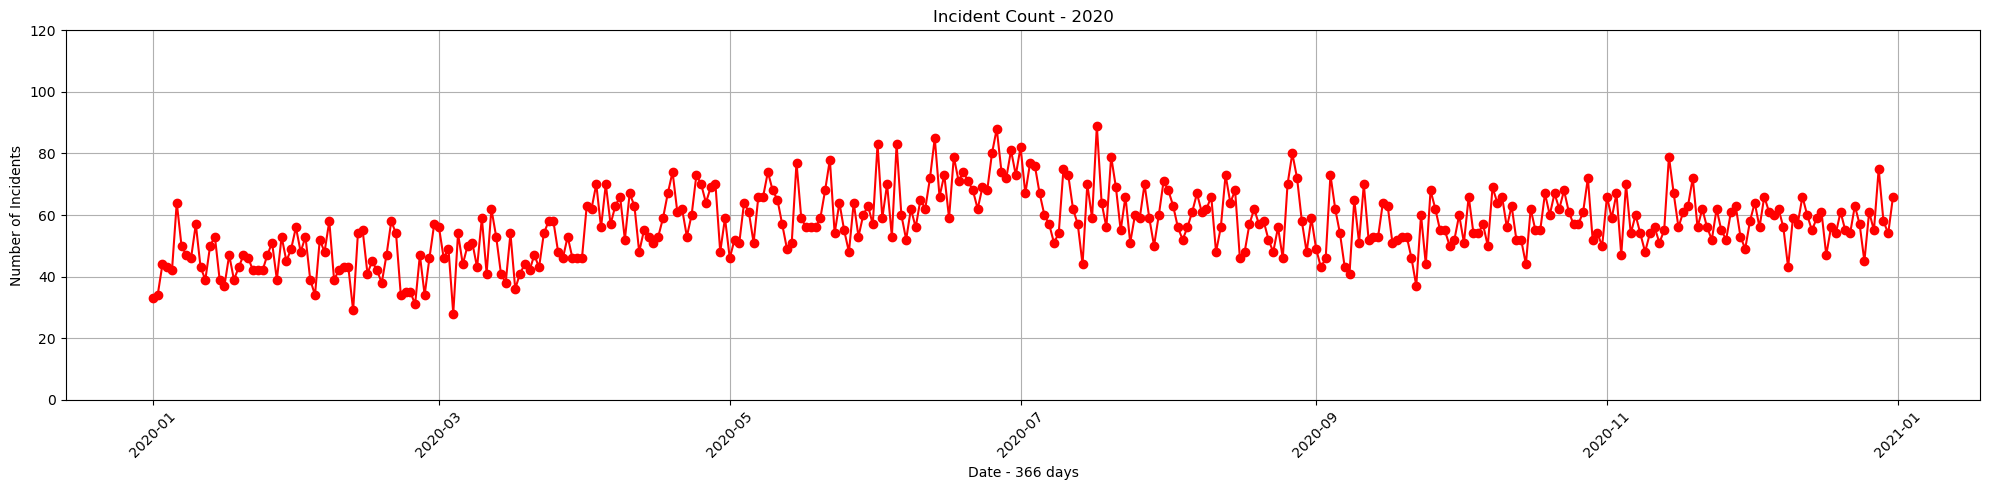

In [895]:
## create the line graph for 2020 leap year

plt.figure(figsize=(20, 5))  
plt.ylim(0, 120) ## y-axis range from 0 to 120

##data_2020 = incident_count_by_date.loc['2020-01-01':'2020-12-31']


plt.plot(data_2020.index, data_2020, c='red', marker='o')

plt.xlabel('Date - 366 days')
plt.ylabel('Number of Incidents')
plt.title('Incident Count - 2020')

plt.xticks(rotation=45)      # Rotate x-axis labels for clarity
plt.grid(True)               # Optional: add grid lines
plt.tight_layout()
plt.show()


We observe a gradual increase in the number of incidents from March to early July. Then, the figure remains steady at around 50-60 cases per day through the end of the year.

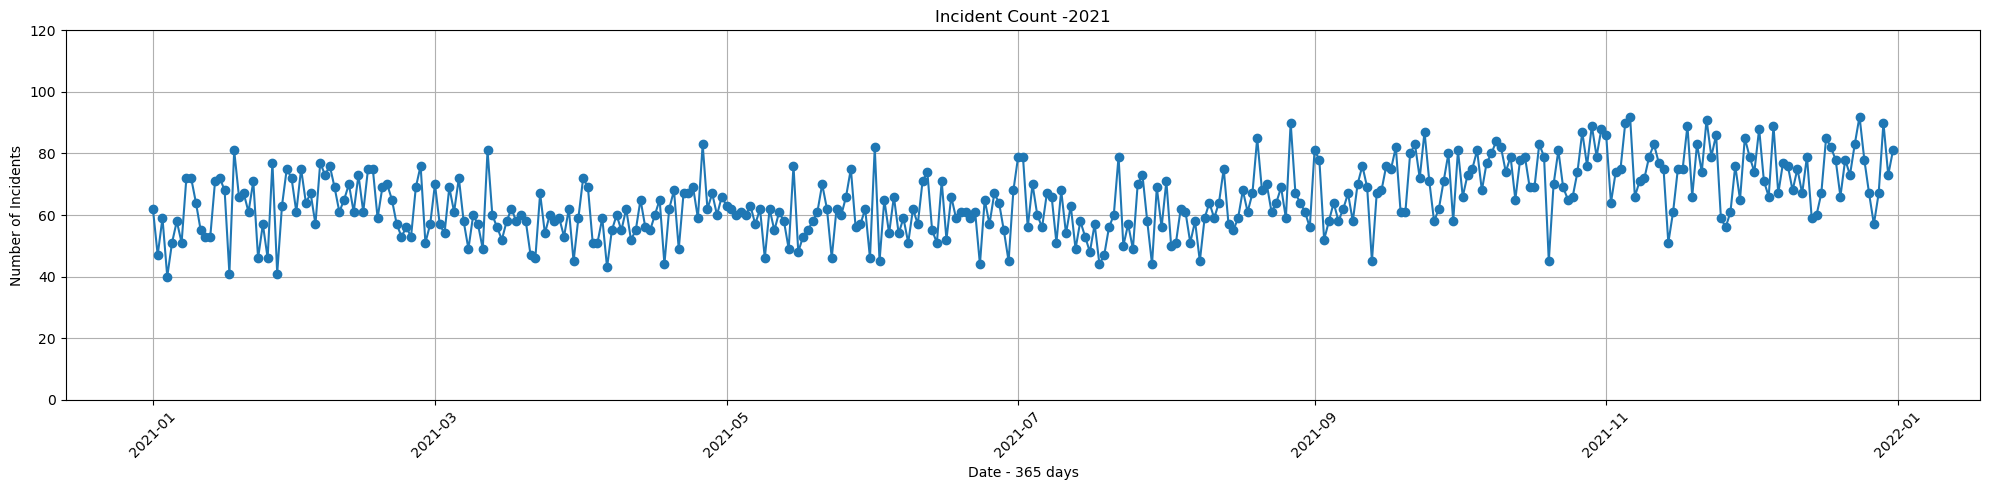

In [428]:
## ## create the  line graph for 2021  non-leap year

plt.figure(figsize=(20, 5)) 
plt.ylim(0, 120)

##data_2021 = incident_count_by_date.loc['2021-01-01':'2021-12-31']

plt.plot(data_2021.index, data_2021, marker='o')

plt.xlabel('Date - 365 days')
plt.ylabel('Number of Incidents')
plt.title('Incident Count -2021')

plt.xticks(rotation=45)      # Rotate x-axis labels for clarity
plt.grid(True)               # Optional: add grid lines
plt.tight_layout()
plt.show()


In 2021, an increase in the number of cases begins around early September and remains at that level until the end of the year


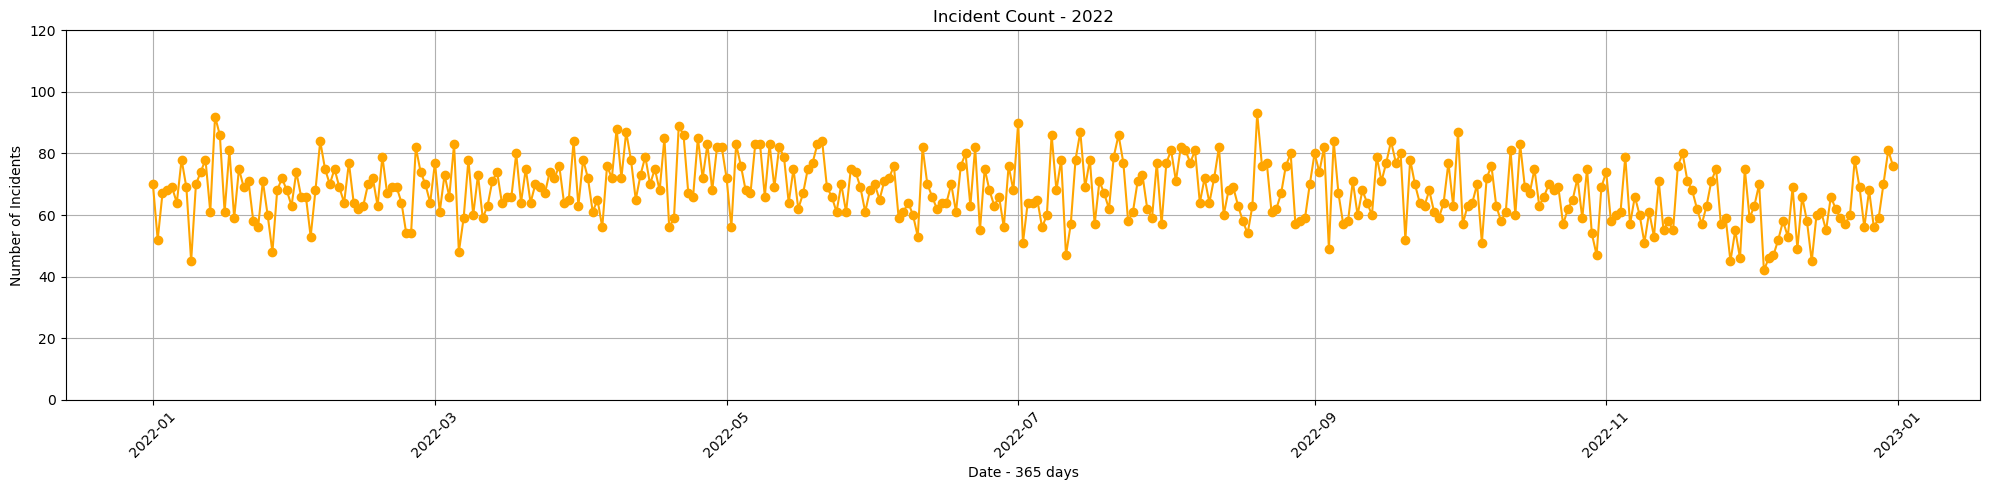

In [897]:
## ## create the line graph for 2022 non-leap year

plt.figure(figsize=(20, 5)) 
plt.ylim(0, 120)

## data_2022 = incident_count_by_date.loc['2022-01-01':'2022-12-31']

##plt.plot(x, y, marker='o')   # Optional: show markers at data points
plt.plot(data_2022.index, data_2022, c='orange', marker='o')

plt.xlabel('Date - 365 days')
plt.ylabel('Number of Incidents')
plt.title('Incident Count - 2022')

plt.xticks(rotation=45)      # Rotate x-axis labels for clarity
plt.grid(True)               # Optional: add grid lines
plt.tight_layout()
plt.show()

The number of cases remains almost constant throughout the entire year


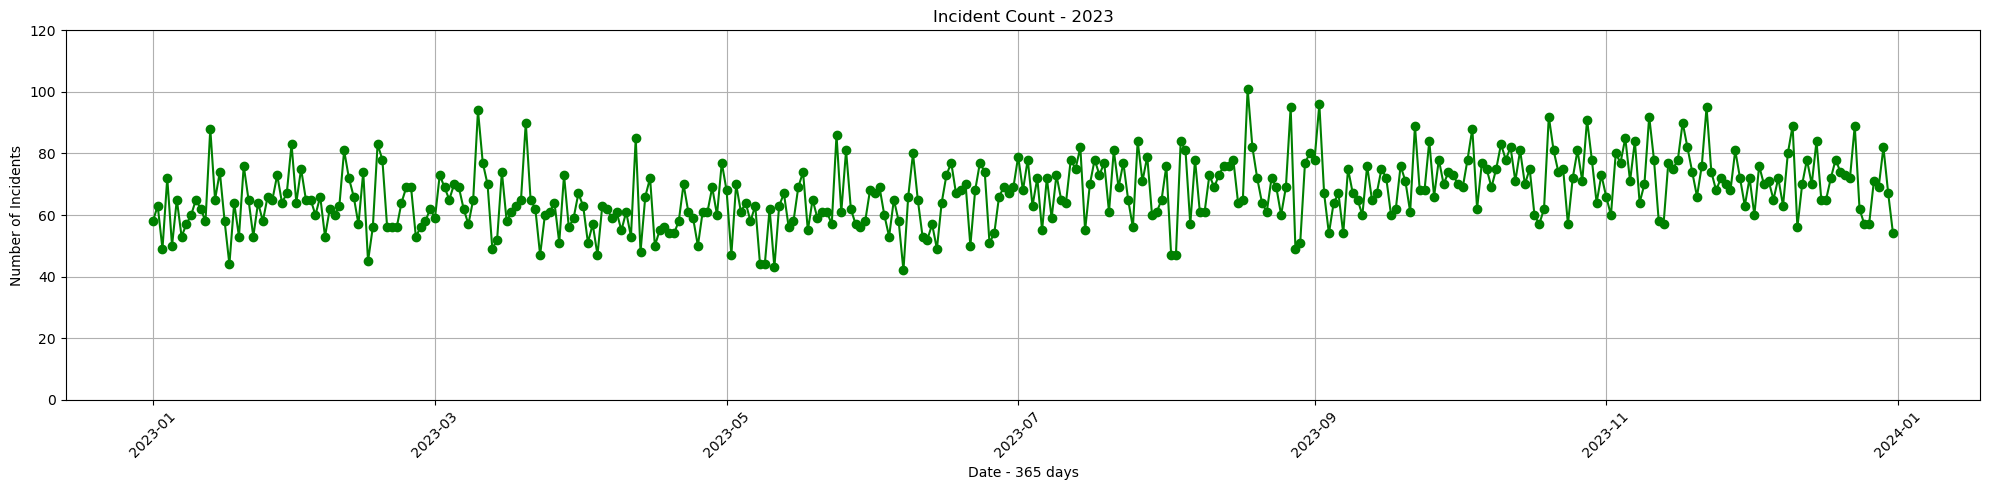

In [899]:
## create the line graph for 2023 non-leap year

plt.figure(figsize=(20, 5))  
plt.ylim(0, 120)

##data_2023 = incident_count_by_date.loc['2023-01-01':'2023-12-31']

plt.plot(data_2023.index, data_2023, c='green', marker='o')

plt.xlabel('Date - 365 days')
plt.ylabel('Number of Incidents')
plt.title('Incident Count - 2023')

plt.xticks(rotation=45)      # Rotate x-axis labels for clarity
plt.grid(True)               # Optional: add grid lines
plt.tight_layout()
plt.show()

A very slight increase is observed in the second half of the year, after which the number of cases remains stable until the end of the year.

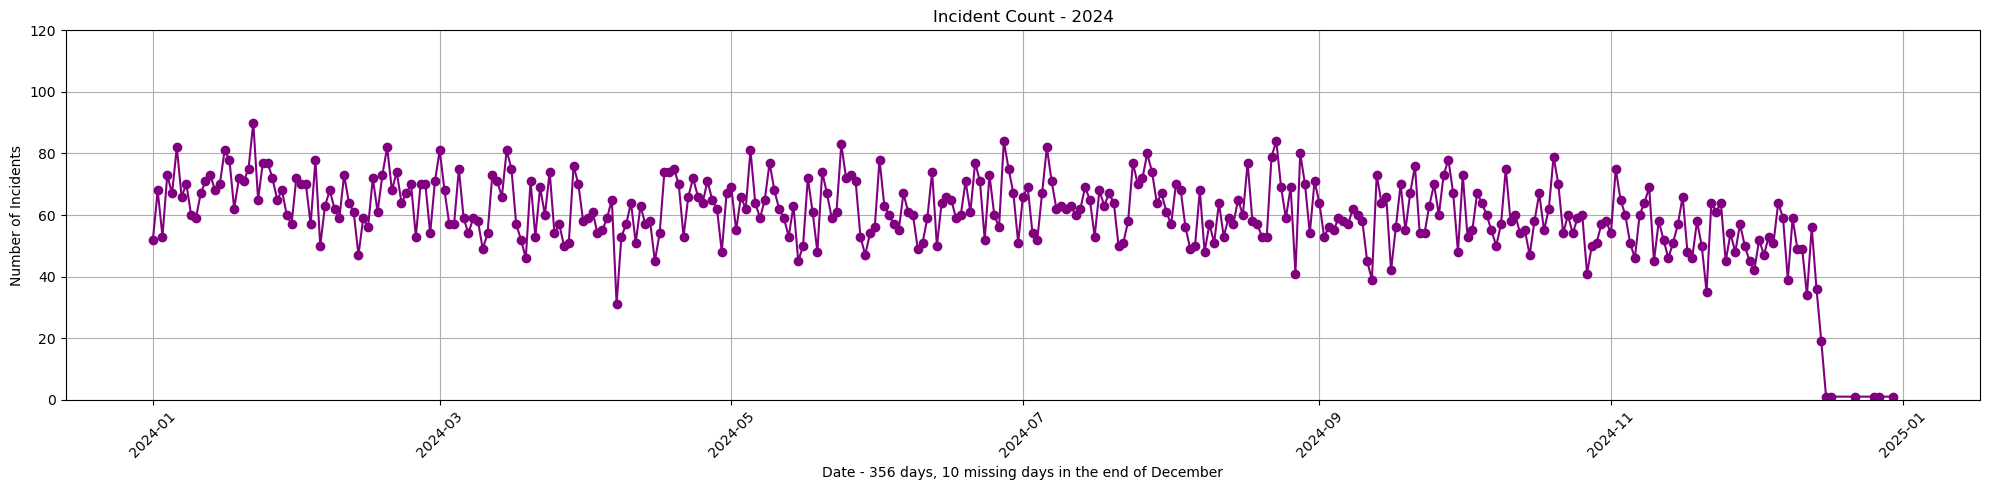

In [901]:
## create the  line graph for 2024 leap year

plt.figure(figsize=(20, 5)) 
plt.ylim(0, 120)

## data_2024 = incident_count_by_date.loc['2024-01-01':'2024-12-31']
plt.ylim(0, 120)

plt.plot(data_2024.index, data_2024, c='purple', marker='o')

plt.xlabel('Date - 356 days, 10 missing days in the end of December')
plt.ylabel('Number of Incidents')
plt.title('Incident Count - 2024')

plt.xticks(rotation=45)      # Rotate x-axis labels for clarity
plt.grid(True)               # Optional: add grid lines
plt.tight_layout()
plt.show()

In 2024, the number of cases remains consistently between 40 and 80. There is a sharp drop in the last two weeks of December, likely due to the fact that not all incidents were recorded. A slight decline starting in early November may be explained by the same reason. It seems appropriate to exclude November and December 2024 from the analysis.






In [442]:
## Preparing slices for scatter plot
# Use a non-leap year (e.g., 2021) to ensure 365 days
dates = pd.date_range(start="2021-01-01", end="2021-12-31", freq='D')

# Format to show only month and day
formatted_dates = dates.strftime('%m-%d')


In [444]:
formatted_dates

Index(['01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07', '01-08',
       '01-09', '01-10',
       ...
       '12-22', '12-23', '12-24', '12-25', '12-26', '12-27', '12-28', '12-29',
       '12-30', '12-31'],
      dtype='object', length=365)

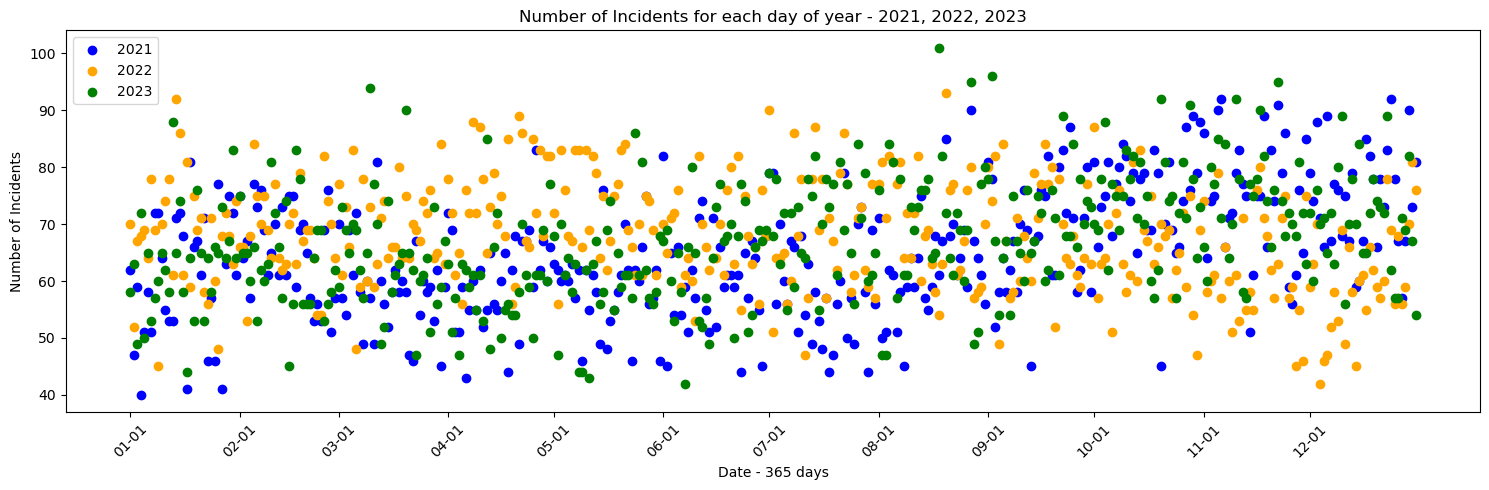

In [903]:
# Filter data by year

plt.figure(figsize=(15, 5))  # Optional: make the plot wider



data_2021_s = incident_count_by_date.loc['2021-01-01':'2021-12-31']
data_2022_s = incident_count_by_date.loc['2022-01-01':'2022-12-31']
data_2023_s = incident_count_by_date.loc['2023-01-01':'2023-12-31']

# Create scatter plot

plt.scatter(formatted_dates, data_2021_s, c='blue', label='2021')
plt.scatter(formatted_dates, data_2022_s, c='orange', label='2022')
plt.scatter(formatted_dates, data_2023_s, c='green', label='2023')

# Customize the plot

formatted_dates
plt.xticks(ticks = ['01-01','02-01','03-01','04-01','05-01','06-01', '07-01','08-01','09-01','10-01', '11-01','12-01'], rotation=45)      
# Rotate x-axis labels for clarity
plt.grid(False)               # Optional: add grid lines

plt.xlabel('Date - 365 days')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents for each day of year - 2021, 2022, 2023')

plt.legend()  # Add legend
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


In the scatter plot we do not observe any clear trends. Similar to the line plots, the scatter plot shows a slight increase in the number of car thefts starting around early September in 2021, and an increase in the second half of the year starting around early July in 2023. In 2022 the distribution of thefts remains stable throughout the year.
At the end of August and the beginning of September, we see individual dates on which the number of thefts significantly increases for all three years.

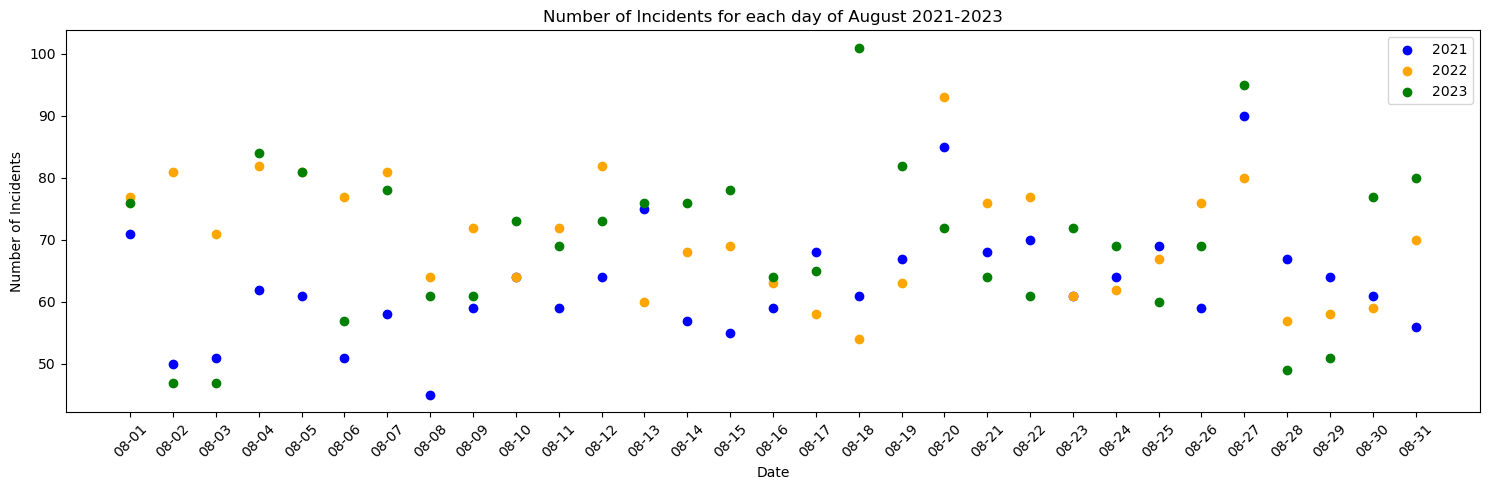

In [930]:
## Check which individual dates in late August show abnormally increased thefts rate

plt.figure(figsize=(15, 5))  # Optional: make the plot wider

dates_aug = pd.date_range(start="2021-08-01", end="2021-08-31", freq='D')

# Format to show only month and day
formatted_dates_aug = dates_aug.strftime('%m-%d')

data_2021_s_aug = incident_count_by_date.loc['2021-08-01':'2021-08-31']
data_2022_s_aug = incident_count_by_date.loc['2022-08-01':'2022-08-31']
data_2023_s_aug = incident_count_by_date.loc['2023-08-01':'2023-08-31']

# Create scatter plot

plt.scatter(formatted_dates_aug, data_2021_s_aug, c='blue', label='2021')
plt.scatter(formatted_dates_aug, data_2022_s_aug, c='orange', label='2022')
plt.scatter(formatted_dates_aug, data_2023_s_aug, c='green', label='2023')

# Customize the plot

plt.xticks(rotation=45)      # Rotate x-axis labels for clarity
plt.grid(False)               # Optional: add grid lines

plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents for each day of August 2021-2023')

plt.legend()  # Add legend
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


An unusual spike for all three years is observed on August 27, and it is difficult to say what it is related to.
There is also a noticeable increase on August 20 across all three observed years.

In [906]:
## Let's see what happened 27 Aug not only in 2021-2023 but also in 2020 and 2024
# Filter rows for 27 August in 2021, 2022, or 2023
filtered_sort_by_convert_date = sort_by_convert_date[
    (sort_by_convert_date['month_day'] =='08-27') &
    (sort_by_convert_date['Month'] == 'August') &
    (sort_by_convert_date['Year'].isin([2020, 2021, 2022, 2023, 2024]))
].copy()


In [593]:
filtered_sort_by_convert_date

,DR_NO,DATE OCC,TIME OCC,Year,Month_num,Month,Day_of_week_num,Day_of_week,month_day
177585,201316120,2020-08-27,1600,2020,8,August,3,Thursday,08-27
19348,201112973,2020-08-27,1900,2020,8,August,3,Thursday,08-27
154568,201612349,2020-08-27,830,2020,8,August,3,Thursday,08-27
197451,201712649,2020-08-27,900,2020,8,August,3,Thursday,08-27
187612,201514474,2020-08-27,1630,2020,8,August,3,Thursday,08-27
...,...,...,...,...,...,...,...,...,...
965329,240313575,2024-08-27,1700,2024,8,August,1,Tuesday,08-27
979776,240510944,2024-08-27,2130,2024,8,August,1,Tuesday,08-27
926447,240117769,2024-08-27,2305,2024,8,August,1,Tuesday,08-27
880359,242111369,2024-08-27,1500,2024,8,August,1,Tuesday,08-27


In [908]:
## 27 August was Thursday in 2020, Friday in 2021, Saturday in 2022, Sunday in 2023 and Tuesday in 2024
filtered_sort_by_convert_date['Day_of_week'].unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Tuesday'],
      dtype=object)

In [910]:
## how many incidents occured on 27 August in 2020, 2021, 2022, 2023 and 2024 years
amount_of_inc=filtered_sort_by_convert_date.groupby('Year')['DR_NO'].count()

In [912]:
amount_of_inc

Year
2020    80
2021    90
2022    80
2023    95
2024    41
Name: DR_NO, dtype: int64

In [914]:
day_of_week_27=['Thursday', 'Friday', 'Saturday', 'Sunday', 'Tuesday']

In [916]:
## the table of average amount of incidents for weekdays which I created in the part 2 'Distibution by weekdays'
## here I use the table to create the list of average amount of incidents for certain day of week
sort_table_week

,Amount of incidents,Amount of days,Average amount of incidents per weekday,Rank
Monday,15613,252,61.956349,3.0
Tuesday,15475,252,61.408730,2.0
Wednesday,16019,253,63.316206,5.0
Thursday,15979,253,63.158103,4.0
Friday,17450,252,69.246032,7.0
Saturday,16817,252,66.734127,6.0
Sunday,15473,252,61.400794,1.0


In [918]:
## create the list of average amounts for Thursday, Friday, Saturday, Sunday and Tuesday
avg_for_weekday=[63.16, 69.24, 66.73, 61.40, 61.41]

In [920]:
## create the table
table_27_08=pd.DataFrame({'Amount of incidents 27 Aug':amount_of_inc,'Day of Week':day_of_week_27,
                          'Average amount of incidents for weekday':avg_for_weekday })

In [924]:
## from this table we can see that 27 of August in 2020-2023 have about 20-30%  more incidents per day than 
## ramdom  Thu, Fri, Sat and Sun in 2020-2024 while 27 Aug in 2024 Tue shows about 30 % less incidents than random Tuesday for these years
table_27_08

,Amount of incidents 27 Aug,Day of Week,Average amount of incidents for weekday
Year,,,
2020,80,Thursday,63.16
2021,90,Friday,69.24
2022,80,Saturday,66.73
2023,95,Sunday,61.40
2024,41,Tuesday,61.41


It’s hard to draw conclusions based on just 5 data points, but for some reason, August 27 consistently shows a number of thefts that is approximately 20–30% higher than the average for that specific day of the week over four consecutive years. In contrast, in 2024, August 27 shows a number of thefts approximately 30% lower than on a random Tuesday.

In the overall statistics, the number of thefts tends to increase toward the end of the week, peaking on Fridays and Saturdays. August 27 in 2021 and 2022 fell on a Friday and Saturday, respectively, and had unusually high theft counts. It’s difficult to explain why this happens—perhaps it's because late August is when people return from vacations before the start of the school year, or maybe there are certain events happening in Los Angeles during that time.

This suggests that it might be interesting to analyze the distribution of thefts on specific weekdays (e.g., Fridays) throughout the year. There could be other individual dates (like Christmas or Thanksgiving) or periods (such as summer break or Easter) when the number of thefts significantly increases or decreases, and these patterns may repeat from year to year.



In [940]:
## choose Fridays only for the most cleaned dataset 'years_5_noNovDec_24' 
friday=years_5_noNovDec_24 [years_5_noNovDec_24['Day_of_week']=='Friday'].copy()

In [944]:
friday

,DR_NO,DATE OCC,TIME OCC,Year,Month_num,Month,Day_of_week_num,Day_of_week,month_day
40076,201204551,2020-01-03,2030,2020,1,January,4,Friday,01-03
127423,201504163,2020-01-03,1730,2020,1,January,4,Friday,01-03
25445,200204122,2020-01-03,1650,2020,1,January,4,Friday,01-03
60438,200304202,2020-01-03,2020,2020,1,January,4,Friday,01-03
67844,201204233,2020-01-03,2300,2020,1,January,4,Friday,01-03
...,...,...,...,...,...,...,...,...,...
942150,241111969,2024-10-25,1,2024,10,October,4,Friday,10-25
976144,240612936,2024-10-25,2000,2024,10,October,4,Friday,10-25
908934,240315687,2024-10-25,1900,2024,10,October,4,Friday,10-25
990572,241111702,2024-10-25,1330,2024,10,October,4,Friday,10-25


In [948]:
friday.shape

(17450, 9)

In [950]:
friday_20=friday[friday['Year']==2020].copy()

In [952]:
friday_21=friday[friday['Year']==2021].copy()

In [954]:
friday_22=friday[friday['Year']==2022].copy()

In [956]:
friday_23=friday[friday['Year']==2023].copy()

In [970]:
friday_24=friday[friday['Year']==2024].copy()

In [649]:
friday_20

,DR_NO,DATE OCC,TIME OCC,Year,Month_num,Month,Day_of_week_num,Day_of_week,month_day
40076,201204551,2020-01-03,2030,2020,1,January,4,Friday,01-03
127423,201504163,2020-01-03,1730,2020,1,January,4,Friday,01-03
25445,200204122,2020-01-03,1650,2020,1,January,4,Friday,01-03
60438,200304202,2020-01-03,2020,2020,1,January,4,Friday,01-03
67844,201204233,2020-01-03,2300,2020,1,January,4,Friday,01-03
...,...,...,...,...,...,...,...,...,...
44077,200416304,2020-12-25,2200,2020,12,December,4,Friday,12-25
117155,211104045,2020-12-25,2200,2020,12,December,4,Friday,12-25
33918,200518228,2020-12-25,2200,2020,12,December,4,Friday,12-25
89763,201016374,2020-12-25,1210,2020,12,December,4,Friday,12-25


In [976]:
friday_24

,DR_NO,DATE OCC,TIME OCC,Year,Month_num,Month,Day_of_week_num,Day_of_week,month_day
912666,240704179,2024-01-05,1455,2024,1,January,4,Friday,01-05
891119,240304394,2024-01-05,1930,2024,1,January,4,Friday,01-05
981870,241704216,2024-01-05,1630,2024,1,January,4,Friday,01-05
950691,241404248,2024-01-05,2100,2024,1,January,4,Friday,01-05
885990,241604183,2024-01-05,2200,2024,1,January,4,Friday,01-05
...,...,...,...,...,...,...,...,...,...
942150,241111969,2024-10-25,1,2024,10,October,4,Friday,10-25
976144,240612936,2024-10-25,2000,2024,10,October,4,Friday,10-25
908934,240315687,2024-10-25,1900,2024,10,October,4,Friday,10-25
990572,241111702,2024-10-25,1330,2024,10,October,4,Friday,10-25


In [960]:
friday_20_count=friday_20.groupby('DATE OCC')['DR_NO'].count()

In [962]:
friday_20_count

DATE OCC
2020-01-03    44
2020-01-10    57
2020-01-17    47
2020-01-24    42
2020-01-31    56
2020-02-07    58
2020-02-14    55
2020-02-21    54
2020-02-28    46
2020-03-06    44
2020-03-13    53
2020-03-20    42
2020-03-27    46
2020-04-03    70
2020-04-10    67
2020-04-17    59
2020-04-24    73
2020-05-01    46
2020-05-08    66
2020-05-15    77
2020-05-22    78
2020-05-29    60
2020-06-05    83
2020-06-12    72
2020-06-19    74
2020-06-26    88
2020-07-03    77
2020-07-10    75
2020-07-17    89
2020-07-24    51
2020-07-31    71
2020-08-07    67
2020-08-14    64
2020-08-21    58
2020-08-28    72
2020-09-04    73
2020-09-11    70
2020-09-18    52
2020-09-25    68
2020-10-02    51
2020-10-09    64
2020-10-16    62
2020-10-23    68
2020-10-30    54
2020-11-06    54
2020-11-13    55
2020-11-20    56
2020-11-27    61
2020-12-04    66
2020-12-11    57
2020-12-18    56
2020-12-25    45
Name: DR_NO, dtype: int64

In [978]:
friday_21_count=friday_21.groupby('DATE OCC')['DR_NO'].count()

In [980]:
friday_22_count=friday_22.groupby('DATE OCC')['DR_NO'].count()

In [982]:
friday_23_count=friday_23.groupby('DATE OCC')['DR_NO'].count()

In [984]:
friday_24_count=friday_24.groupby('DATE OCC')['DR_NO'].count()

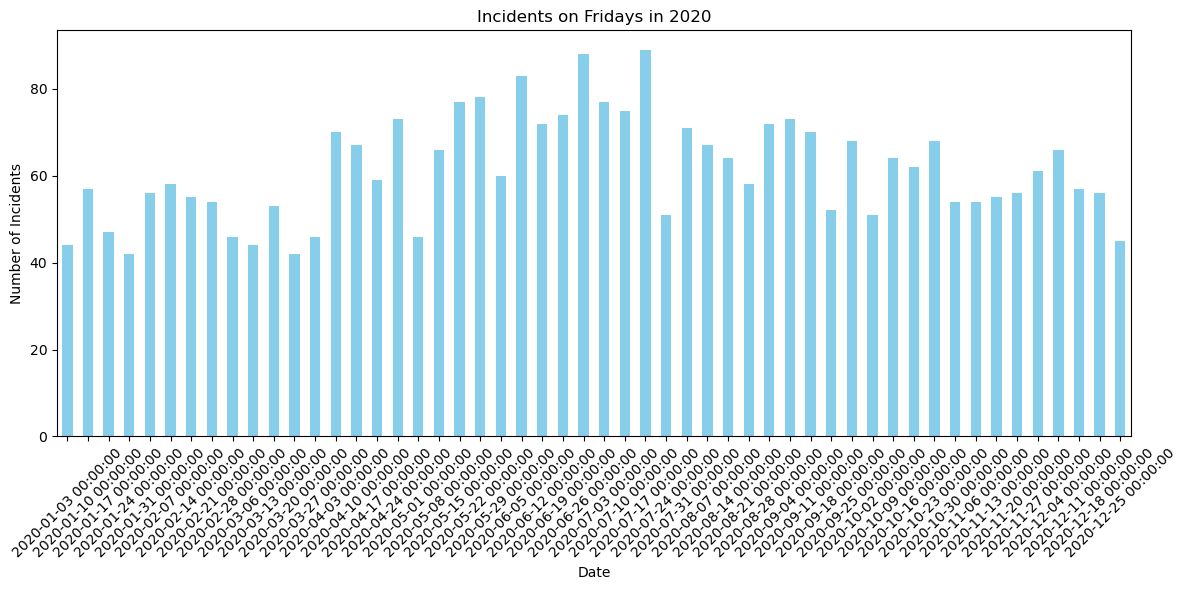

In [986]:
# Create a bar plot from the Series
friday_20_count.plot(
    kind='bar',
    figsize=(12, 6),
    color='skyblue'
)

# Add plot labels and title
plt.ylabel('Number of Incidents')
plt.xlabel('Date')
plt.title('Incidents on Fridays in 2020')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [964]:
friday_21_count=friday_21.groupby('DATE OCC')['DR_NO'].count()

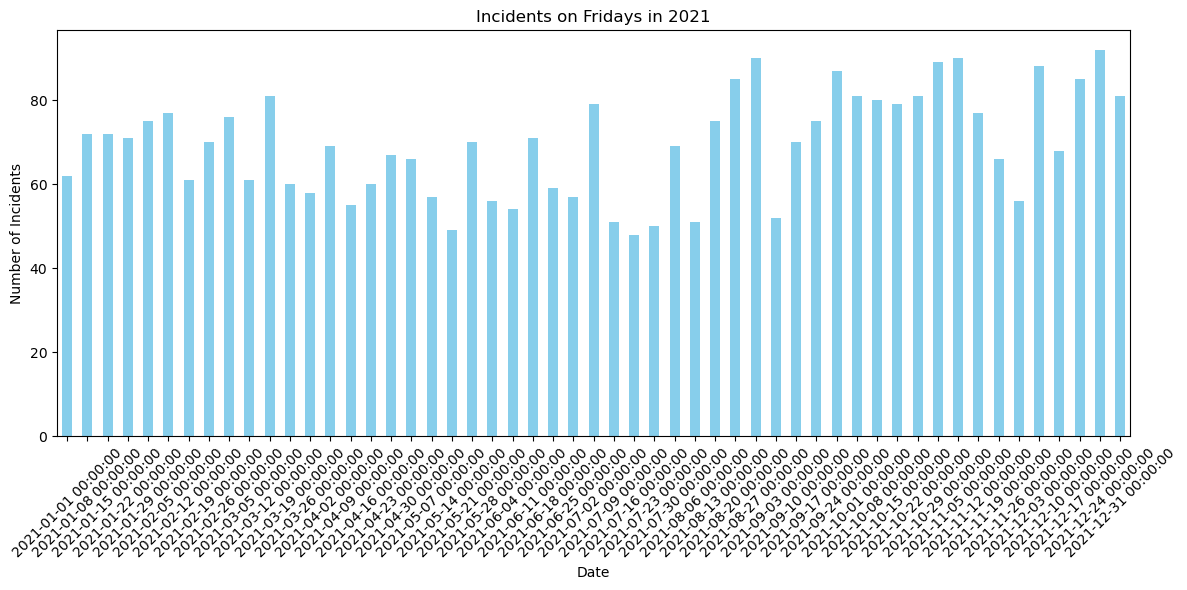

In [988]:
# Create a bar plot from the Series
friday_21_count.plot(
    kind='bar',
    figsize=(12, 6),
    color='skyblue'
)

# Add plot labels and title
plt.ylabel('Number of Incidents')
plt.xlabel('Date')
plt.title('Incidents on Fridays in 2021')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [703]:
friday_22_count=friday_22.groupby('DATE OCC')['DR_NO'].count()

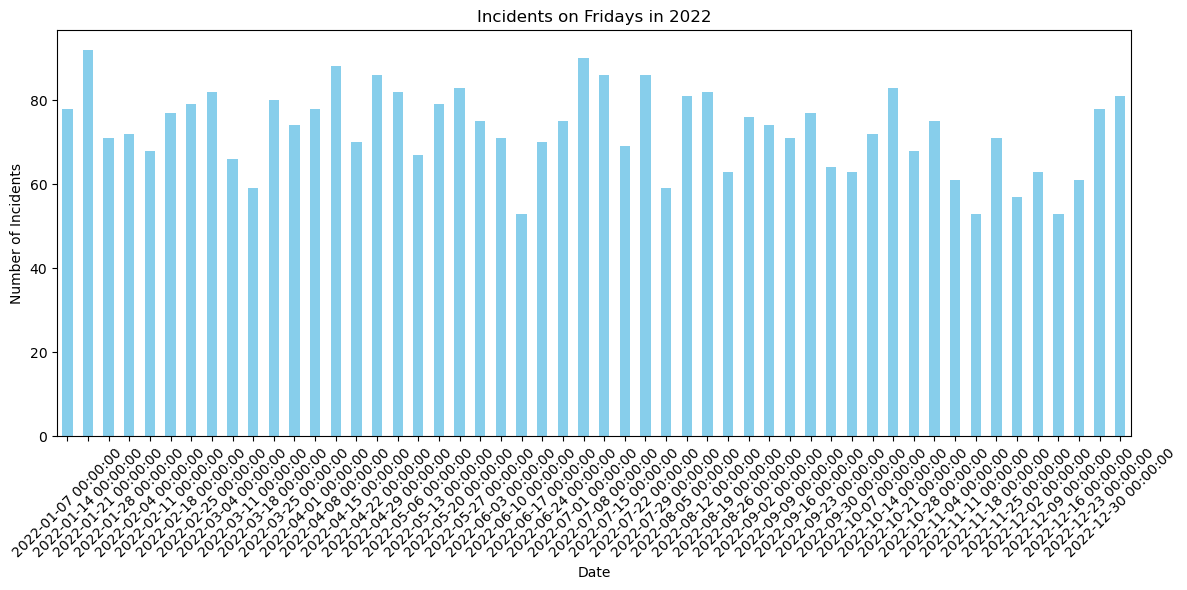

In [994]:
# Create a bar plot from the Series
friday_22_count.plot(
    kind='bar',
    figsize=(12, 6),
    color='skyblue'
)

# Add plot labels and title
plt.ylabel('Number of Incidents')
plt.xlabel('Date')
plt.title('Incidents on Fridays in 2022')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

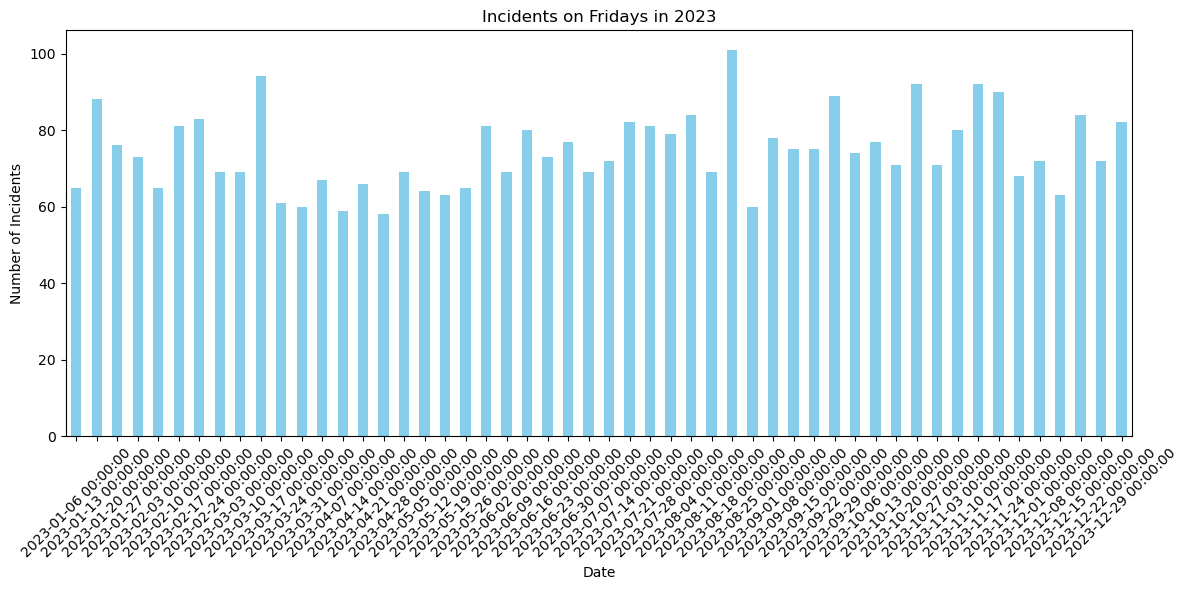

In [711]:
# Create a bar plot from the Series
friday_23_count.plot(
    kind='bar',
    figsize=(12, 6),
    color='skyblue'
)

# Add plot labels and title
plt.ylabel('Number of Incidents')
plt.xlabel('Date')
plt.title('Incidents on Fridays in 2023')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

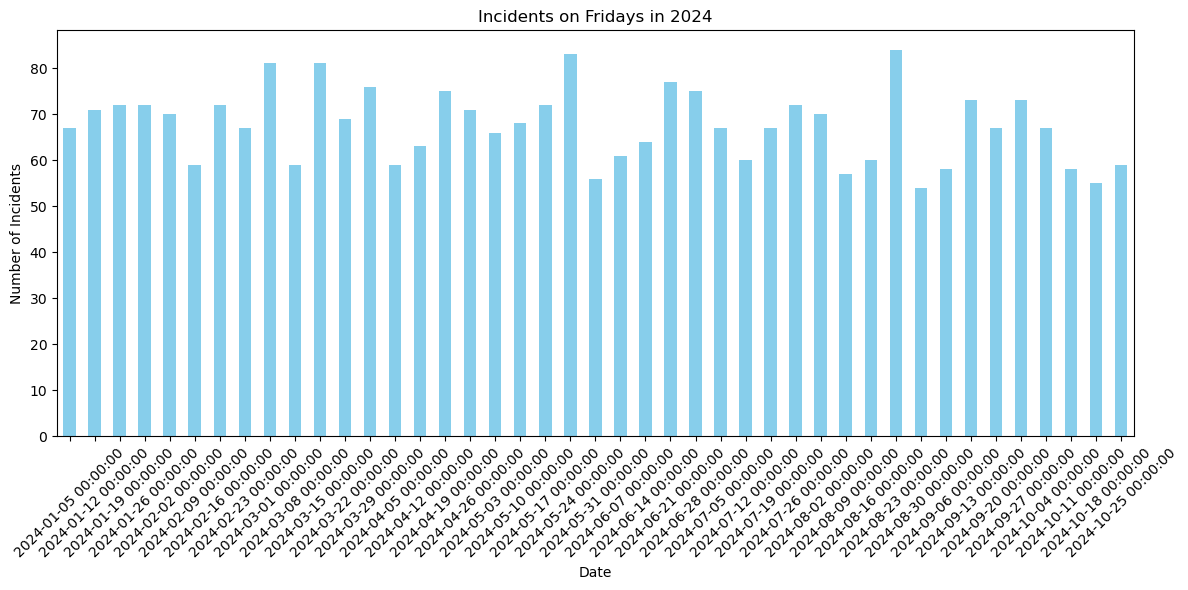

In [998]:
# Create a bar plot from the Series
friday_24_count.plot(
    kind='bar',
    figsize=(12, 6),
    color='skyblue'
)

# Add plot labels and title
plt.ylabel('Number of Incidents')
plt.xlabel('Date')
plt.title('Incidents on Fridays in 2024')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

The distribution of car theft incidents on Fridays does not show any clear, recurring pattern from year to year. In 2020, there is a slight increase in thefts on Fridays during the spring and summer months, while in 2021, the increase is observed toward the end of the year. The years from 2022 to 2024 do not display any clear trends. For this reason, I decided not to analyze the remaining days of the week and instead moved on to examining the distribution of thefts throughout the day.

## 4. Distribution by time of day

In [1003]:
## We use the prepared data frame 'years_5_noNovDec_24'
years_5_noNovDec_24

,DR_NO,DATE OCC,TIME OCC,Year,Month_num,Month,Day_of_week_num,Day_of_week,month_day
113004,200204420,2020-01-01,1800,2020,1,January,2,Wednesday,01-01
199743,201804223,2020-01-01,1400,2020,1,January,2,Wednesday,01-01
7092,200404013,2020-01-01,230,2020,1,January,2,Wednesday,01-01
187651,201604047,2020-01-01,2100,2020,1,January,2,Wednesday,01-01
162318,202004054,2020-01-01,1900,2020,1,January,2,Wednesday,01-01
...,...,...,...,...,...,...,...,...,...
926778,240315910,2024-10-31,2000,2024,10,October,3,Thursday,10-31
995045,240411170,2024-10-31,300,2024,10,October,3,Thursday,10-31
926552,241912791,2024-10-31,2200,2024,10,October,3,Thursday,10-31
983551,241216714,2024-10-31,1700,2024,10,October,3,Thursday,10-31


In [1005]:
# The column 'TIME OCC' has 'int' datatype
years_5_noNovDec_24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112826 entries, 113004 to 878869
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   DR_NO            112826 non-null  int64         
 1   DATE OCC         112826 non-null  datetime64[ns]
 2   TIME OCC         112826 non-null  int64         
 3   Year             112826 non-null  int32         
 4   Month_num        112826 non-null  int32         
 5   Month            112826 non-null  object        
 6   Day_of_week_num  112826 non-null  int32         
 7   Day_of_week      112826 non-null  object        
 8   month_day        112826 non-null  object        
dtypes: datetime64[ns](1), int32(3), int64(2), object(3)
memory usage: 7.3+ MB


In [1007]:
## Extract the hour from 'int' values for 'TIME OCC' and create the column 'Hour'
years_5_noNovDec_24['Hour'] = years_5_noNovDec_24['TIME OCC'].astype(str).str.zfill(4).str[:2].astype(int)

In [1013]:
years_5_noNovDec_24

,DR_NO,DATE OCC,TIME OCC,Year,Month_num,Month,Day_of_week_num,Day_of_week,month_day,Hour
113004,200204420,2020-01-01,1800,2020,1,January,2,Wednesday,01-01,18
199743,201804223,2020-01-01,1400,2020,1,January,2,Wednesday,01-01,14
7092,200404013,2020-01-01,230,2020,1,January,2,Wednesday,01-01,2
187651,201604047,2020-01-01,2100,2020,1,January,2,Wednesday,01-01,21
162318,202004054,2020-01-01,1900,2020,1,January,2,Wednesday,01-01,19
...,...,...,...,...,...,...,...,...,...,...
926778,240315910,2024-10-31,2000,2024,10,October,3,Thursday,10-31,20
995045,240411170,2024-10-31,300,2024,10,October,3,Thursday,10-31,3
926552,241912791,2024-10-31,2200,2024,10,October,3,Thursday,10-31,22
983551,241216714,2024-10-31,1700,2024,10,October,3,Thursday,10-31,17


In [1011]:
## The column 'Hour' datatype was changed from int64 to int32
years_5_noNovDec_24.info()


<class 'pandas.core.frame.DataFrame'>
Index: 112826 entries, 113004 to 878869
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   DR_NO            112826 non-null  int64         
 1   DATE OCC         112826 non-null  datetime64[ns]
 2   TIME OCC         112826 non-null  int64         
 3   Year             112826 non-null  int32         
 4   Month_num        112826 non-null  int32         
 5   Month            112826 non-null  object        
 6   Day_of_week_num  112826 non-null  int32         
 7   Day_of_week      112826 non-null  object        
 8   month_day        112826 non-null  object        
 9   Hour             112826 non-null  int32         
dtypes: datetime64[ns](1), int32(4), int64(2), object(3)
memory usage: 7.7+ MB


In [1015]:
## The slice contains 112 826 observation
years_5_noNovDec_24.shape

(112826, 10)

In [1021]:
## amount of observation for every hour for the chosen period
years_5_noNovDec_24.groupby('Hour')['DR_NO'].count()


Hour
0     3715
1     3128
2     2811
3     2382
4     2150
5     2318
6     2626
7     2846
8     3435
9     3082
10    3460
11    3185
12    4999
13    3501
14    4195
15    4990
16    5645
17    7323
18    8544
19    7988
20    8330
21    7761
22    8067
23    6345
Name: DR_NO, dtype: int64

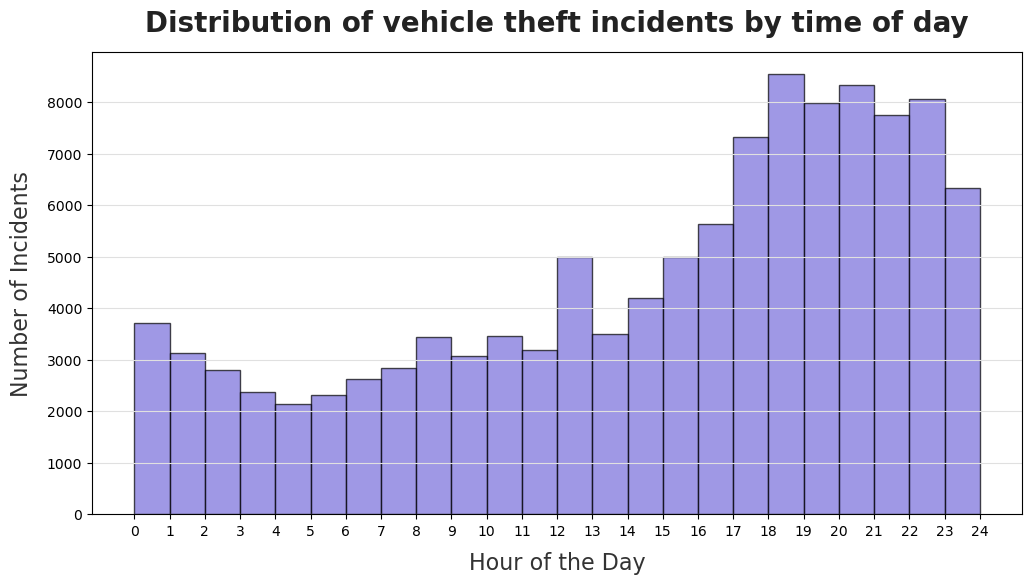

In [1034]:
plt.figure(figsize=(12, 6))
plt.hist(years_5_noNovDec_24['Hour'], bins=range(0, 25), color='#766CDB', edgecolor='black', alpha=0.7)
plt.title('Distribution of vehicle theft incidents by time of day', fontsize=20, fontweight='semibold', color='#222222', pad=15)
plt.xlabel ('Hour of the Day', fontsize=16, color='#333333', labelpad=10)
plt.ylabel('Number of Incidents', fontsize=16, color='#333333', labelpad=10)
plt.xticks(range(0, 25))
plt.grid(axis='y', color='#E0E0E0')
plt.show()

The histogram of car theft distribution by hour shows the following patterns:

A sharp decrease in thefts between 00:00 and 01:00 compared to the previous hour between 23:00 and 00:00. This could be explained either by an actual drop in thefts after midnight or by the way the time of the theft is recorded in police reports — possibly, when the exact time is unknown, there is a tendency to record it as occurring on the previous day rather than the new day.

Starting from 01:00 AM, there is a gradual decline in the number of thefts, reaching a minimum between 04:00 and 05:00.

After that, there is a gradual increase, and from 08:00 to 15:00, the number of thefts stays around 3,000, with a sharp peak between 12:00 and 13:00. This peak may be due to actual causes or possibly due to reporting tendencies when thefts occurring in the afternoon are more often recorded during this time.

From 15:00 onwards, we observe a significant increase in the number of thefts, peaking between 18:00 and 19:00 (with over 8,000 thefts during this hour over a five-year period). After this peak, the number of thefts remains around 8,000. A sharp decline begins at 23:00 and continues through the night hours until 04:00.



For comparison, I created the same histogram using data that includes November–December 2024 and January–March 2025.
This histogram shows exactly the same distribution as the first one, likely due to the large number of observations over the five-year period compared to the five months, during which the data is incomplete.



In [1027]:
sort_by_convert_date['Hour'] = sort_by_convert_date['TIME OCC'].astype(str).str.zfill(4).str[:2].astype(int)

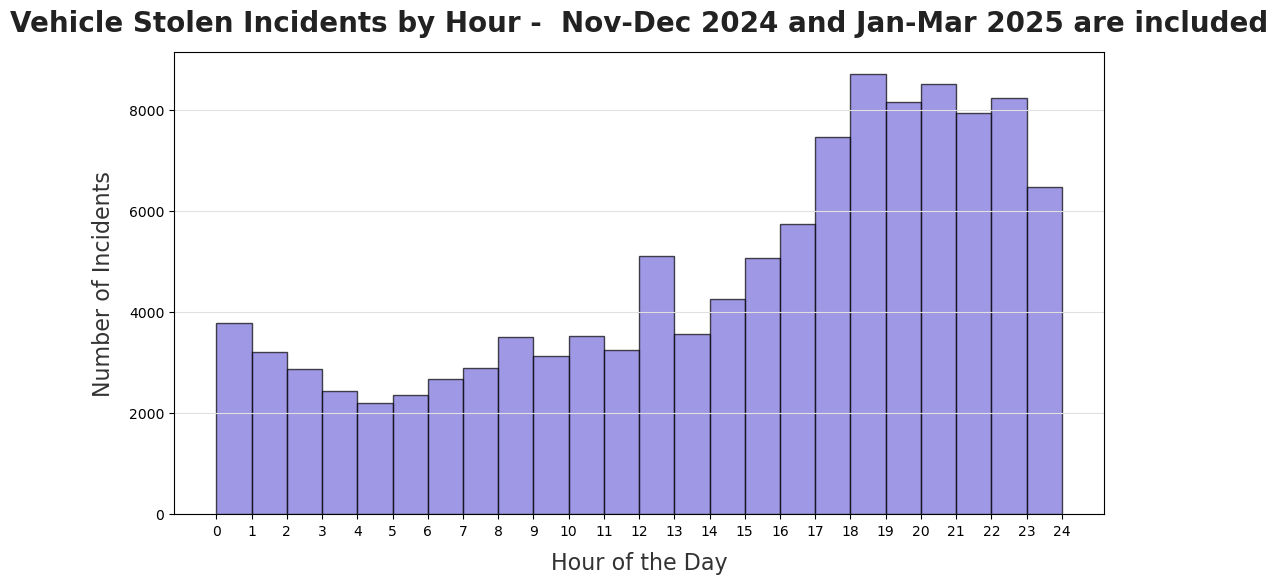

In [1029]:
plt.figure(figsize=(12, 6))
plt.hist(sort_by_convert_date['Hour'], bins=range(0, 25), color='#766CDB', edgecolor='black', alpha=0.7)
plt.title('Vehicle Stolen Incidents by Hour -  Nov-Dec 2024 and Jan-Mar 2025 are included', fontsize=20, fontweight='semibold', color='#222222', pad=15)
plt.xlabel('Hour of the Day', fontsize=16, color='#333333', labelpad=10)
plt.ylabel('Number of Incidents', fontsize=16, color='#333333', labelpad=10)
plt.xticks(range(0, 25))
plt.grid(axis='y', color='#E0E0E0')
plt.show()